In [1]:
import geopandas as gpd
import palettable.colorbrewer.diverging

from lonboard import Map, PathLayer
from lonboard.colormap import apply_continuous_cmap

In [2]:
url = "https://naciscdn.org/naturalearth/10m/cultural/ne_10m_roads_north_america.zip"

In [3]:
gdf = gpd.read_file(url, engine="pyogrio")

In [4]:
gdf.head()

,prefix,number,class,type,divided,country,state,note,scalerank,uident,length,rank,continent,geometry
0,None,None,Other,Unpaved,None,United States,California,None,12,0,10.373500,0,North America,"LINESTRING (-119.63954 37.85634, -119.63954 37..."
1,None,None,Other,Other Paved,None,United States,Nevada,None,12,1,2.307760,0,North America,"LINESTRING (-119.76779 39.14514, -119.74707 39..."
2,None,S2,Other,Other Paved,None,Mexico,None,None,11,2,92.178100,-1,North America,"LINESTRING (-116.47485 33.09658, -116.46246 33..."
3,None,S1,Other,Other Paved,None,United States,California,None,11,3,46.124100,0,North America,"LINESTRING (-116.56070 33.01205, -116.55359 33..."
4,None,S1,Other,Secondary,Undivided,United States,California,None,10,4,0.305463,0,North America,"LINESTRING (-116.50827 32.81225, -116.50820 32..."


In [5]:
gdf = gdf[gdf["state"] == "California"]

In [6]:
layer = PathLayer.from_geopandas(gdf, width_min_pixels=0.8)
map_ = Map(layers=[layer])
map_

Map(layers=[PathLayer(table=pyarrow.Table
prefix: string
number: string
class: string
type: string
divided: st…

In [7]:
layer.get_color = [200, 0, 200]

In [8]:
gdf["scalerank"].value_counts().sort_index()

scalerank
3       19
4       93
5       35
6       94
7      178
8      122
9        1
10     237
11     541
12    1562
Name: count, dtype: int64

In [9]:
normalized_scale_rank = (gdf["scalerank"] - 3) / 9

In [10]:
normalized_scale_rank.min(), normalized_scale_rank.max()

(0.0, 1.0)

In [11]:
cmap = palettable.colorbrewer.diverging.PuOr_10

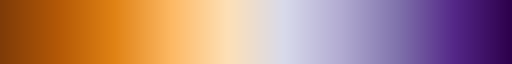

In [12]:
cmap.mpl_colormap

In [13]:
layer.get_color = apply_continuous_cmap(
    normalized_scale_rank, palettable.colorbrewer.diverging.PuOr_10, alpha=0.8
)

In [14]:
map_

Map(layers=[PathLayer(get_color=<pyarrow.lib.FixedSizeListArray object at 0x12a9b36a0>
[
  [
    45,
    0,
  …